<a href="https://colab.research.google.com/github/monkeyvisco/blackboards_and_chalk/blob/main/unsupervised_classification_elbow_k_means_mv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read in the CSV file as a Pandas DataFrame
spread_df = pd.read_csv("Resources/stock_data.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the DataFrame
spread_df.head()

,close,volume,open,high,low,returns,hi_low_spread
date,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33


In [ ]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(spread_df)
    inertia.append(k_model.inertia_)

In [ ]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,2.835703e+18
1,2,9.903144e+17
2,3,4.999629e+17
3,4,3.062378e+17
4,5,2.108099e+17
5,6,1.540278e+17
6,7,1.101960e+17
7,8,8.450014e+16
8,9,6.995127e+16
9,10,5.220169e+16


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

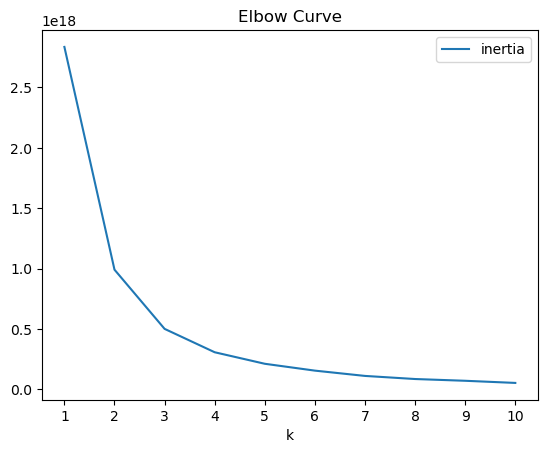

In [ ]:
# Plot the elbow curve using Pandas plot.
df_elbow.plot.line(
    x="k",
    y= "inertia",
    title="Elbow Curve",
    xticks=k
)

## Perform the following tasks for each of the two most likely values of `k`:

* Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame and call it `spread_predictions_df`.

* Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "close" price.

In [ ]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_lower = model.predict(spread_df)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions = spread_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

In [ ]:
spread_df_predictions

,close,volume,open,high,low,returns,hi_low_spread,clusters_lower
date,,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20,1
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35,1
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47,1
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28,1
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33,1
...,...,...,...,...,...,...,...,...
2019-04-23,27.97,41583740,28.18,28.49,27.79,-0.007452,0.70,0
2019-04-24,28.46,51487330,28.10,28.85,27.93,0.017519,0.92,0
2019-04-25,27.66,56709000,28.67,28.86,27.36,-0.028110,1.50,0


<Axes: xlabel='hi_low_spread', ylabel='close'>

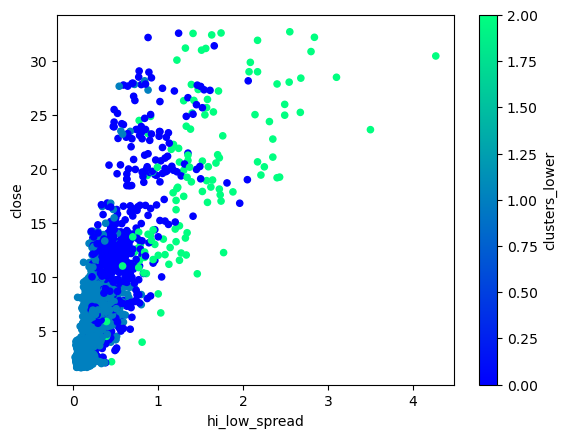

In [ ]:
# Visualize the data
spread_df_predictions.plot.scatter(
    x="hi_low_spread",
    y="close",
    c="clusters_lower",
    colormap="winter")

In [ ]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_higher = model.predict(spread_df)

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_higher'] = k_higher

<Axes: xlabel='hi_low_spread', ylabel='close'>

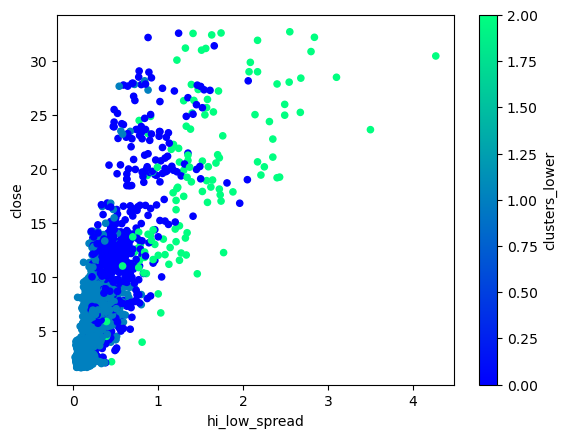

In [ ]:
# Plot the clusters
spread_df_predictions.plot.scatter(
    x="hi_low_spread",
    y="close",
    c="clusters_lower",
    colormap="winter")

## Answer the following question
---
Considering the plot, what’s the best number of clusters to choose, or value of k?

- From the scatter plots, it's a little hard to tell given the variability and quantity of the data, but it appears that the optimal value for k, the number of clusters, is 3.